<a href="https://colab.research.google.com/github/TeDand/neuromorphic-classification/blob/main/video_reconstructions_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook Setup

## Hardware Setup

In [ ]:
import tensorflow as tf

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

gpu = tf.test.gpu_device_name()
print(gpu)

Sat Jun 25 14:33:12 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    31W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# E2VID

## Clone Repository

In [ ]:
!git clone https://github.com/uzh-rpg/rpg_e2vid.git

Cloning into 'rpg_e2vid'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 74 (delta 26), reused 21 (delta 21), pack-reused 34
Unpacking objects: 100% (74/74), done.


To run the video reconstruction model you need to run the following commands:

```bash
!cd rpg_e2vid/ && rm -rf outputs && mkdir outputs
!cd rpg_e2vid/ && python run_reconstruction.py \
  -c pretrained/E2VID_lightweight.pth.tar \
  -i data/NMNIST/Train/0/08356.zip \
  --auto_hdr \
  --output_folder outputs/
```

## Load Pre-Trained Weights and Data

### Weights

In [ ]:
!cd rpg_e2vid/ && wget "http://rpg.ifi.uzh.ch/data/E2VID/models/E2VID_lightweight.pth.tar" -O pretrained/E2VID_lightweight.pth.tar

--2022-06-12 21:47:30--  http://rpg.ifi.uzh.ch/data/E2VID/models/E2VID_lightweight.pth.tar
Resolving rpg.ifi.uzh.ch (rpg.ifi.uzh.ch)... 130.60.75.162
Connecting to rpg.ifi.uzh.ch (rpg.ifi.uzh.ch)|130.60.75.162|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://rpg.ifi.uzh.ch/data/E2VID/models/E2VID_lightweight.pth.tar [following]
--2022-06-12 21:47:31--  https://rpg.ifi.uzh.ch/data/E2VID/models/E2VID_lightweight.pth.tar
Connecting to rpg.ifi.uzh.ch (rpg.ifi.uzh.ch)|130.60.75.162|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://download.ifi.uzh.ch/rpg/web/data/E2VID/models/E2VID_lightweight.pth.tar [following]
--2022-06-12 21:47:32--  https://download.ifi.uzh.ch/rpg/web/data/E2VID/models/E2VID_lightweight.pth.tar
Resolving download.ifi.uzh.ch (download.ifi.uzh.ch)... 130.60.61.200
Connecting to download.ifi.uzh.ch (download.ifi.uzh.ch)|130.60.61.200|:443... connected.
HTTP request sent, awai

### Sample Data

In [ ]:
!cd rpg_e2vid/ && wget "http://rpg.ifi.uzh.ch/data/E2VID/datasets/ECD_IJRR17/dynamic_6dof.zip" -O data/dynamic_6dof.zip

### DAVIS SLAM Dataset

In [ ]:
!wget https://rpg.ifi.uzh.ch/datasets/davis/outdoors_running.zip -O /content/davis_data.zip
!unzip -q /content/davis_data.zip -d /content/davis_data
!rm -rf /content/davis_data.zip

--2022-06-12 22:01:41--  https://rpg.ifi.uzh.ch/datasets/davis/outdoors_running.zip
Resolving rpg.ifi.uzh.ch (rpg.ifi.uzh.ch)... 130.60.75.162
Connecting to rpg.ifi.uzh.ch (rpg.ifi.uzh.ch)|130.60.75.162|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://download.ifi.uzh.ch/rpg/web/datasets/davis/outdoors_running.zip [following]
--2022-06-12 22:01:43--  https://download.ifi.uzh.ch/rpg/web/datasets/davis/outdoors_running.zip
Resolving download.ifi.uzh.ch (download.ifi.uzh.ch)... 130.60.61.200
Connecting to download.ifi.uzh.ch (download.ifi.uzh.ch)|130.60.61.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 587238947 (560M) [application/zip]
Saving to: ‘/content/davis_data.zip’

/content/davis_data 100%[===================>] 560.03M  11.7MB/s    in 52s     

2022-06-12 22:02:36 (10.9 MB/s) - ‘/content/davis_data.zip’ saved [587238947/587238947]



In [ ]:
!mkdir /content/rpg_e2vid/data/DAVIS
!wget https://rpg.ifi.uzh.ch/datasets/davis/outdoors_running.zip -O /content/rpg_e2vid/data/DAVIS/davis_data.zip
!unzip -q /content/rpg_e2vid/data/DAVIS/davis_data.zip -d /content/rpg_e2vid/data/DAVIS/davis_data
!rm -rf /content/rpg_e2vid/data/DAVIS/davis_data.zip
!cd /content/rpg_e2vid/data/DAVIS/davis_data && rm -rf images
!sed -i '1s/^/240 180\n /' /content/rpg_e2vid/data/DAVIS/davis_data/events.txt
!cd /content/rpg_e2vid/data/DAVIS/ && zip -r davis_data.zip davis_data/events.txt
!rm -rf /content/rpg_e2vid/data/DAVIS/davis_data

mkdir: cannot create directory ‘/content/rpg_e2vid/data/DAVIS’: File exists
--2022-06-12 21:48:49--  https://rpg.ifi.uzh.ch/datasets/davis/outdoors_running.zip
Resolving rpg.ifi.uzh.ch (rpg.ifi.uzh.ch)... 130.60.75.162
Connecting to rpg.ifi.uzh.ch (rpg.ifi.uzh.ch)|130.60.75.162|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://download.ifi.uzh.ch/rpg/web/datasets/davis/outdoors_running.zip [following]
--2022-06-12 21:48:51--  https://download.ifi.uzh.ch/rpg/web/datasets/davis/outdoors_running.zip
Resolving download.ifi.uzh.ch (download.ifi.uzh.ch)... 130.60.61.200
Connecting to download.ifi.uzh.ch (download.ifi.uzh.ch)|130.60.61.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 587238947 (560M) [application/zip]
Saving to: ‘/content/rpg_e2vid/data/DAVIS/davis_data.zip’

/content/rpg_e2vid/ 100%[===================>] 560.03M  12.1MB/s    in 50s     

2022-06-12 21:49:42 (11.2 MB/s) - ‘/content/rpg_e2vid/data/DA

In [ ]:
!rm -rf /content/reconstructions
!mkdir /content/reconstructions/
!mkdir /content/reconstructions/DAVIS
!python /content/rpg_e2vid/run_reconstruction.py \
  -c /content/rpg_e2vid/pretrained/E2VID_lightweight.pth.tar \
  -i /content/rpg_e2vid/data/DAVIS/davis_data.zip \
  --auto_hdr \
  --output_folder /content/reconstructions/DAVIS

/content/rpg_e2vid/run_reconstruction.py:43: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype={'width': np.int, 'height': np.int},
Sensor size: 240 x 180
Loading model /content/rpg_e2vid/pretrained/E2VID_lightweight.pth.tar...
Using TransposedConvLayer (fast, with checkerboard artefacts)
Device: cuda:0
== Image reconstruction == 
Image size: 180x240
== Event preprocessing ==
Will normalize event tensors.
== Image Writer ==
Will write images to: /content/reconstructions/DAVIS/reconstruction
Will use 15119 events per tensor (automatically estima

# NMNIST

### Load Data

In [ ]:
import os
import shutil

!mkdir /content/NMNIST
!wget -O "NMNIST_training.zip" "https://data.mendeley.com/public-files/datasets/468j46mzdv/files/39c25547-014b-4137-a934-9d29fa53c7a0/file_downloaded"
!unzip -q NMNIST_training.zip -d /content/NMNIST
!rm /content/NMNIST_training.zip
!wget -O "NMNIST_testing.zip" "https://data.mendeley.com/public-files/datasets/468j46mzdv/files/05a4d654-7e03-4c15-bdfa-9bb2bcbea494/file_downloaded"
!unzip -q NMNIST_testing.zip -d /content/NMNIST
!rm /content/NMNIST_testing.zip
!rm -rf /content/rpg_e2vid/data/NMNIST

def read_events(input_file, output_file):
  infile = open(input_file, "rb")
  # reading 5 bytes (40 bits) at a time
  event = int.from_bytes(infile.read(5), byteorder="little", signed=False)
  text = "34 34\n"

  while event:
    # interpreting binary data
    location_mask = 0b11111111
    x_location = location_mask & event
    y_location = location_mask & (event>>8)
    polarity = 0b1 & (event>>16)
    timestamp_mask = 0b11111111111111111111111
    timestamp = timestamp_mask & (event>>17)
    # appending to list of events
    text = text + "{0} {1} {2} {3}\n".format(timestamp, x_location, y_location, polarity)
    # reading next event
    event = int.from_bytes(infile.read(5), byteorder="little", signed=False)

  # Open a file with access mode 'a'
  outfile = open(output_file, 'w')
  # Append 'hello' at the end of file
  outfile.write(text)
  # Close the file
  outfile.close()

os.mkdir("/content/rpg_e2vid/data/NMNIST")
max_samples = 300

def load_nmnist_samples(train):
  print("Loading {0} samples".format("training" if train else "testing"))
  folder = "Train" if train else "Test"
  os.mkdir("/content/rpg_e2vid/data/NMNIST/{0}".format(folder))
  for act_class in range(10):
    print(' class {0}'.format(act_class))
    directory = "/content/NMNIST/{0}/{1}/".format(folder, act_class)
    os.mkdir("/content/rpg_e2vid/data/NMNIST/{0}/{1}".format(folder, act_class))
    count = 0
    for sample in os.listdir(directory):
        zip_directory = "/content/rpg_e2vid/data/NMNIST/{0}/{1}/{2}".format(folder, act_class, sample[:-4])
        input_directory = os.path.join(directory, sample)
        output_directory = "{0}/events.txt".format(zip_directory)
        if os.path.isfile(input_directory) and count < (max_samples if train else max_samples /4):
            if(count % 60 != 0 or count == 0):
              print(".", end="")
            else:
              print(".")
            os.mkdir(zip_directory)
            events = read_events(input_directory, output_directory)
            shutil.make_archive(zip_directory, 'zip', zip_directory)
            shutil.rmtree(zip_directory, ignore_errors=False, onerror=None)
        count = count + 1
    print("")

load_nmnist_samples(train=True)
load_nmnist_samples(train=False)

!rm -rf /content/NMNIST

--2022-05-23 12:59:21--  https://data.mendeley.com/public-files/datasets/468j46mzdv/files/39c25547-014b-4137-a934-9d29fa53c7a0/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.133.86, 162.159.130.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.133.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/1afc103f-8799-464a-a214-81bb9b1f9337 [following]
--2022-05-23 12:59:22--  https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/1afc103f-8799-464a-a214-81bb9b1f9337
Resolving md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)... 52.218.88.80
Connecting to md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)|52.218.88.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1011893601 (965M) [applicatio

### Create and Save Video Reconstructions

In [ ]:
import subprocess

!rm -rf /content/reconstructions
os.mkdir("/content/reconstructions")
os.mkdir("/content/reconstructions/NMNIST")

def reconstruct_NMIST(train):
  print("Reconstructing {0} samples".format("training" if train else "testing"))
  folder = "Train" if train else "Test"
  os.mkdir("/content/reconstructions/NMNIST/{0}".format(folder))
  for act_class in range(10):
    print(' class {0}'.format(act_class))
    recon_directory = "/content/reconstructions/NMNIST/{0}/{1}/".format(folder, act_class)
    os.mkdir(recon_directory)
    sample_directory = "data/NMNIST/{0}/{1}/".format(folder, act_class)
    count = 0
    for sample in os.listdir("/content/rpg_e2vid/{0}".format(sample_directory)):
      new_directory = "{0}/{1}".format(recon_directory, sample[:-4])
      os.mkdir(new_directory)
      if(count % 60 != 0 or count == 0):
        print(".", end="")
      else:
        print(".")
      cmd = "python /content/rpg_e2vid/run_reconstruction.py \
            -c /content/rpg_e2vid/pretrained/E2VID_lightweight.pth.tar \
            -i /content/rpg_e2vid/{0}/{1} \
            --auto_hdr \
            --output_folder {2}".format(sample_directory, sample, new_directory)
      # subprocess.call(cmd, shell=True)
      process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)
      output, error = process.communicate()
      # print(output.decode("utf-8") )
      count = count + 1
    print("")

reconstruct_NMIST(train=True)
reconstruct_NMIST(train=False)

Reconstructing training samples
 class 0
.............................................................
............................................................
............................................................
............................................................
...........................................................
 class 1
.............................................................
............................................................
............................................................
............................................................
...........................................................
 class 2
.............................................................
............................................................
............................................................
............................................................
...........................................................
 class 3
.................

### Load Video Reconstructions

In [ ]:
!unzip -q NMNIST_reconstructed.zip -d /content/reconstructions

replace /content/reconstructions/NMNIST/Test/6/08201/reconstruction/frame_0000004444.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import os
import numpy as np

max_frame_count = 0

print("Checking training reconstructions")
for act_class in range(10):
    class_directory = "/content/reconstructions/NMNIST/Train/{0}".format(act_class)
    for reconstruction in os.listdir(class_directory):
      current_recon_dir = os.path.join(class_directory, reconstruction)
      frame_count = 0
      for frame in os.listdir("{0}/reconstruction".format(current_recon_dir)):
        f = os.path.join("{0}/reconstruction".format(current_recon_dir), frame)
        if frame.endswith('.png'):
          frame_count += 1
      if frame_count > max_frame_count:
        max_frame_count = frame_count

print("Checking testing reconstructions")
for act_class in range(10):
    class_directory = "/content/reconstructions/NMNIST/Test/{0}".format(act_class)
    for reconstruction in os.listdir(class_directory):
      current_recon_dir = os.path.join(class_directory, reconstruction)
      frame_count = 0
      for frame in os.listdir("{0}/reconstruction".format(current_recon_dir)):
        f = os.path.join("{0}/reconstruction".format(current_recon_dir), frame)
        if frame.endswith('.png'):
          frame_count += 1
      if(frame_count > max_frame_count):
        max_frame_count = frame_count

print("The maximum video length in the dataset is {0} frames".format(max_frame_count))

Checking training reconstructions
Checking testing reconstructions
The maximum video length in the dataset is 20 frames


In [ ]:
import os
import imageio
import numpy as np
from keras.utils import np_utils
from itertools import islice, cycle
from sklearn.model_selection import train_test_split

x_train = []
y_train = []
print("Loading training reconstructions")
for act_class in range(10):
    print(' class {0}'.format(act_class))
    class_directory = "/content/reconstructions/NMNIST/Train/{0}".format(act_class)
    count = 0
    for reconstruction in os.listdir(class_directory):
      current_recon_dir = os.path.join(class_directory, reconstruction)
      if(count % 60 != 0 or count == 0):
        print(".", end="")
      else:
        print(".")
      current_recon = []
      for frame in os.listdir("{0}/reconstruction".format(current_recon_dir)):
        f = os.path.join("{0}/reconstruction".format(current_recon_dir), frame)
        if frame.endswith('.png'):
          im = imageio.imread(f)
          current_recon.append(im)
      current_recon = list(islice(cycle(current_recon), max_frame_count))
      x_train.append(current_recon)
      y_train.append(np_utils.to_categorical(act_class, 10))
      count = count + 1
    print("")

x_test = []
y_test = []
print("Loading testing reconstructions")
for act_class in range(10):
    print(' class {0}'.format(act_class))
    class_directory = "/content/reconstructions/NMNIST/Test/{0}".format(act_class)
    count = 0
    for reconstruction in os.listdir(class_directory):
      current_recon_dir = os.path.join(class_directory, reconstruction)
      if(count % 60 != 0 or count == 0):
        print(".", end="")
      else:
        print(".")
      current_recon = []
      for frame in os.listdir("{0}/reconstruction".format(current_recon_dir)):
        f = os.path.join("{0}/reconstruction".format(current_recon_dir), frame)
        if frame.endswith('.png'):
          im = imageio.imread(f)
          current_recon.append(im)
      current_recon = list(islice(cycle(current_recon), max_frame_count))
      x_test.append(current_recon)
      y_test.append(np_utils.to_categorical(act_class, 10))
      count = count + 1
    print("")

x_train = np.array(x_train)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], x_train.shape[3], 1)
train_set = x_train.astype('float32')
train_set -= np.mean(x_train)
train_set /= np.max(x_train)

x_test = np.array(x_test)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], x_test.shape[3], 1)
test_set = x_test.astype('float32')
test_set -= np.mean(x_train)
test_set /= np.max(x_train)

x_train = train_set
x_test = test_set

y_train = np.array(y_train)
y_test = np.array(y_test)

x_train, x_val, y_train, y_val=  train_test_split(x_train, y_train, test_size=0.2, random_state=4)

Loading training reconstructions
 class 0
.............................................................
............................................................
............................................................
............................................................
...........................................................
 class 1
.............................................................
............................................................
............................................................
............................................................
...........................................................
 class 2
.............................................................
............................................................
............................................................
............................................................
...........................................................
 class 3
................

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2400, 20, 34, 34, 1)
(2400, 10)
(750, 20, 34, 34, 1)
(750, 10)


## Classification Networks

### 3D Convolutional Network

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution3D, MaxPooling3D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from keras.callbacks import TensorBoard, EarlyStopping
import keras

# Initialing the Training Parameters
batch_size = 32
nb_classes = 10
nb_epoch = 120

# Number of convolutional filters to use at each layer
nb_filters = 32
# Level of pooling to perform at each layer (POOL x POOL)
nb_pool = 2
# Level of convolution to perform at each layer (CONV x CONV)
nb_conv = 5

# Defining the 3D Convolution Neural Network model
model = Sequential()
model.add(Convolution3D(nb_filters,kernel_size=nb_conv,input_shape=x_train.shape[1:], activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Convolution3D(nb_filters,kernel_size=nb_conv,input_shape=x_train.shape[1:], activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling3D(pool_size=nb_pool,padding='same'))

model.add(Dropout(0.25))

model.add(Convolution3D(nb_filters*2,kernel_size=nb_conv,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling3D(pool_size=nb_pool,padding='same'))

model.add(Dropout(0.25))

model.add(Convolution3D(nb_filters*4,kernel_size=nb_conv,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Convolution3D(nb_filters*4,kernel_size=nb_conv,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling3D(pool_size=nb_pool,padding='same'))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,kernel_initializer = 'he_normal',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(nb_classes,kernel_initializer = 'he_normal'))
model.add(Activation('softmax'))

opt=Adam(lr=0.0001)

# Compile the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

logdir = "logs/scalars/conv3d_nmnist"

# Training  the model along with creating callbacks to tensorboard for graphical visualization of training process
tbcallback = keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=0, write_graph=True, write_images=True)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True)
hist = model.fit(x_train, y_train, validation_data=(x_val,y_val),
          batch_size=batch_size,epochs = nb_epoch,shuffle=True,verbose=1,callbacks=[tbcallback, early_stopping])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/120
75/75 [==============================] - 15s 182ms/step - loss: 2.6456 - accuracy: 0.2325 - val_loss: 2.8469 - val_accuracy: 0.1083
Epoch 2/120
75/75 [==============================] - 13s 178ms/step - loss: 1.7738 - accuracy: 0.4496 - val_loss: 3.8887 - val_accuracy: 0.1083
Epoch 3/120
75/75 [==============================] - 13s 178ms/step - loss: 1.3908 - accuracy: 0.5708 - val_loss: 6.9408 - val_accuracy: 0.1083
Epoch 4/120
75/75 [==============================] - 13s 178ms/step - loss: 1.1817 - accuracy: 0.6179 - val_loss: 6.3587 - val_accuracy: 0.1083
Epoch 5/120
75/75 [==============================] - 13s 179ms/step - loss: 1.0178 - accuracy: 0.6812 - val_loss: 6.4972 - val_accuracy: 0.1617
Epoch 6/120
75/75 [==============================] - 13s 179ms/step - loss: 0.9197 - accuracy: 0.6917 - val_loss: 3.3641 - val_accuracy: 0.3033
Epoch 7/120
75/75 [==============================] - 13s 178ms/step - loss: 0.7900 - accuracy: 0.7400 - val_loss: 1.7814 - val_accuracy:

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution3D, MaxPooling3D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from keras.callbacks import TensorBoard, EarlyStopping
import keras

# Initialing the Training Parameters
batch_size = 32
nb_classes = 10
nb_epoch = 120

# Number of convolutional filters to use at each layer
nb_filters = 32
# Level of pooling to perform at each layer (POOL x POOL)
nb_pool = 2
# Level of convolution to perform at each layer (CONV x CONV)
nb_conv = 5

# Defining the 3D Convolution Neural Network model
model = Sequential()
model.add(Convolution3D(nb_filters,kernel_size=nb_conv,input_shape=x_train.shape[1:], activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Convolution3D(nb_filters,kernel_size=nb_conv,input_shape=x_train.shape[1:], activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling3D(pool_size=nb_pool,padding='same'))

model.add(Dropout(0.25))

model.add(Convolution3D(nb_filters*2,kernel_size=nb_conv,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling3D(pool_size=nb_pool,padding='same'))

model.add(Dropout(0.25))

model.add(Convolution3D(nb_filters*4,kernel_size=nb_conv,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Convolution3D(nb_filters*4,kernel_size=nb_conv,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling3D(pool_size=nb_pool,padding='same'))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,kernel_initializer = 'he_normal',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(nb_classes,kernel_initializer = 'he_normal'))
model.add(Activation('softmax'))

opt=Adam(lr=0.0001)

model.summary()

# Compile the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

logdir = "logs/scalars/conv3d_nmnist"

# Training  the model along with creating callbacks to tensorboard for graphical visualization of training process
tbcallback = keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=0, write_graph=True, write_images=True)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True)
hist = model.fit(x_train, y_train, validation_data=(x_val,y_val),
          batch_size=batch_size,epochs = nb_epoch,shuffle=True,verbose=1,callbacks=[tbcallback, early_stopping])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 20, 34, 34, 32)    4032      
                                                                 
 batch_normalization (BatchN  (None, 20, 34, 34, 32)   128       
 ormalization)                                                   
                                                                 
 conv3d_1 (Conv3D)           (None, 20, 34, 34, 32)    128032    
                                                                 
 batch_normalization_1 (Batc  (None, 20, 34, 34, 32)   128       
 hNormalization)                                                 
                                                                 
 max_pooling3d (MaxPooling3D  (None, 10, 17, 17, 32)   0         
 )                                                               
                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/120
75/75 [==============================] - 28s 188ms/step - loss: 2.6691 - accuracy: 0.2217 - val_loss: 2.7249 - val_accuracy: 0.1083
Epoch 2/120
75/75 [==============================] - 13s 179ms/step - loss: 1.7808 - accuracy: 0.4250 - val_loss: 3.8360 - val_accuracy: 0.1083
Epoch 3/120
75/75 [==============================] - 14s 180ms/step - loss: 1.4365 - accuracy: 0.5400 - val_loss: 5.4225 - val_accuracy: 0.1050
Epoch 4/120
75/75 [==============================] - 13s 179ms/step - loss: 1.2078 - accuracy: 0.6137 - val_loss: 6.0552 - val_accuracy: 0.1117
Epoch 5/120
75/75 [==============================] - 13s 179ms/step - loss: 1.0115 - accuracy: 0.6675 - val_loss: 5.2817 - val_accuracy: 0.1750
Epoch 6/120
75/75 [==============================] - 13s 179ms/step - loss: 0.8938 - accuracy: 0.7075 - val_loss: 4.2255 - val_accuracy: 0.2100
Epoch 7/120
75/75 [==============================] - 13s 179ms/step - loss: 0.7526 - accuracy: 0.7563 - val_loss: 2.9013 - val_accuracy:

In [ ]:
from keras.models import load_model

model.save('/content/drive/MyDrive/models/conv3d_nmnist_recon.h5')  # creates a HDF5 file 'my_model.h5'
# del model  # deletes the existing model

#### Results

In [ ]:
from keras.models import load_model

model = load_model('/content/drive/MyDrive/models/conv3d_nmnist_recon.h5')

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
y_pred = model.predict(x_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.47015225887298584
Test accuracy: 0.8666666746139526


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        75
           1       0.95      0.96      0.95        75
           2       0.85      0.93      0.89        75
           3       0.84      0.71      0.77        75
           4       0.93      0.84      0.88        75
           5       0.71      0.87      0.78        75
           6       0.87      0.91      0.89        75
           7       0.91      0.85      0.88        75
           8       0.86      0.73      0.79        75
           9       0.85      0.91      0.88        75

    accuracy                           0.87       750
   macro avg       0.87      0.87      0.87       750
weighted avg       0.87      0.87      0.87       750



[Text(0, 0.5, '0'),
 Text(0, 1.5, '1'),
 Text(0, 2.5, '2'),
 Text(0, 3.5, '3'),
 Text(0, 4.5, '4'),
 Text(0, 5.5, '5'),
 Text(0, 6.5, '6'),
 Text(0, 7.5, '7'),
 Text(0, 8.5, '8'),
 Text(0, 9.5, '9')]

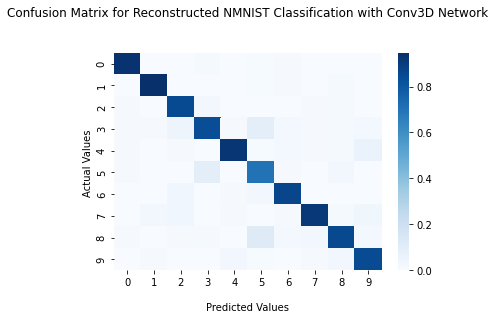

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
from keras.utils import np_utils
import seaborn as sns

#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), normalize='pred')

ax = sns.heatmap(result, annot=False, cmap='Blues')

ax.set_title('Confusion Matrix for Reconstructed NMNIST Classification with Conv3D Network\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([i for i in range(10)])
ax.yaxis.set_ticklabels([i for i in range(10)])

### Conv LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.callbacks import TensorBoard
import keras
from sklearn.model_selection import train_test_split

timesteps = 20
width = 34
height = 34
channels = 1
action_num = 10

model = models.Sequential(
    [
        layers.Input(
            shape=(timesteps, width, height, channels)
        ),
        layers.ConvLSTM2D(
            filters=64, kernel_size=(3, 3), padding="same", return_sequences=True, dropout=0.1, recurrent_dropout=0.1
        ),
        layers.MaxPool3D(
            pool_size=(1, 2, 2), strides=(1, 2, 2), padding="same"
        ),
        layers.BatchNormalization(),
        layers.ConvLSTM2D(
            filters=32, kernel_size=(3, 3), padding="same", return_sequences=True, dropout=0.1, recurrent_dropout=0.1
        ),
        layers.MaxPool3D(
            pool_size=(1, 2, 2), strides=(1, 2, 2), padding="same"
        ),
        layers.BatchNormalization(),
        layers.ConvLSTM2D(
            filters=16, kernel_size=(3, 3), padding="same", return_sequences=False, dropout=0.1, recurrent_dropout=0.1
        ),
        layers.MaxPool2D(
            pool_size=(2, 2), strides=(2, 2), padding="same"
        ),
        layers.BatchNormalization(),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(action_num, activation='softmax')
    ]
)

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-4),
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True)
logdir = "logs/NMNIST_ConvLSTM"
# Training  the model along with creating callbacks to tensorboard for graphical visualization of training process
tbcallback = keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=0, write_graph=True, write_images=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=40, validation_data=(x_val, y_val), callbacks=[early_stopping, tbcallback])

Epoch 1/40


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


75/75 [==============================] - 35s 382ms/step - loss: 2.2404 - accuracy: 0.1967 - val_loss: 2.3011 - val_accuracy: 0.1050
Epoch 2/40
75/75 [==============================] - 28s 375ms/step - loss: 1.8606 - accuracy: 0.3600 - val_loss: 2.2871 - val_accuracy: 0.1033
Epoch 3/40
75/75 [==============================] - 28s 369ms/step - loss: 1.5679 - accuracy: 0.4854 - val_loss: 2.2010 - val_accuracy: 0.2450
Epoch 4/40
75/75 [==============================] - 28s 370ms/step - loss: 1.2941 - accuracy: 0.5717 - val_loss: 2.0215 - val_accuracy: 0.3200
Epoch 5/40
75/75 [==============================] - 28s 371ms/step - loss: 1.1081 - accuracy: 0.6283 - val_loss: 1.6978 - val_accuracy: 0.4800
Epoch 6/40
75/75 [==============================] - 28s 371ms/step - loss: 0.9836 - accuracy: 0.6871 - val_loss: 1.3598 - val_accuracy: 0.5850
Epoch 7/40
75/75 [==============================] - 28s 373ms/step - loss: 0.8761 - accuracy: 0.7196 - val_loss: 1.1703 - val_accuracy: 0.6400
Epoch 8/40

In [ ]:
from keras.models import load_model

model.save('/content/drive/MyDrive/models/conv_lstm_nmnist_recon.h5')  # creates a HDF5 file 'my_model.h5'
# del model  # deletes the existing model

#### Results

In [ ]:
from keras.models import load_model

model = load_model('/content/drive/MyDrive/models/conv_lstm_nmnist_recon.h5')

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
y_pred = model.predict(x_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6660446524620056
Test accuracy: 0.7960000038146973


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87        75
           1       0.96      0.96      0.96        75
           2       0.82      0.91      0.86        75
           3       0.77      0.57      0.66        75
           4       0.74      0.72      0.73        75
           5       0.67      0.71      0.69        75
           6       0.88      0.85      0.86        75
           7       0.85      0.84      0.85        75
           8       0.74      0.64      0.69        75
           9       0.71      0.84      0.77        75

    accuracy                           0.80       750
   macro avg       0.80      0.80      0.79       750
weighted avg       0.80      0.80      0.79       750



[Text(0, 0.5, '0'),
 Text(0, 1.5, '1'),
 Text(0, 2.5, '2'),
 Text(0, 3.5, '3'),
 Text(0, 4.5, '4'),
 Text(0, 5.5, '5'),
 Text(0, 6.5, '6'),
 Text(0, 7.5, '7'),
 Text(0, 8.5, '8'),
 Text(0, 9.5, '9')]

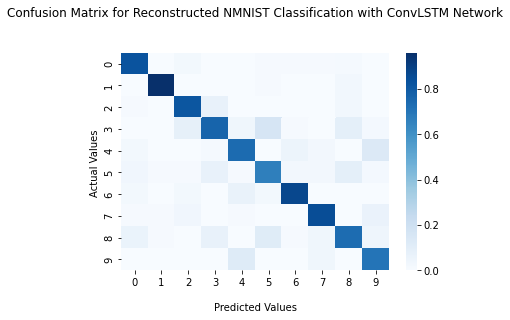

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
from keras.utils import np_utils
import seaborn as sns

#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), normalize='pred')

ax = sns.heatmap(result, annot=False, cmap='Blues')

ax.set_title('Confusion Matrix for Reconstructed NMNIST Classification with ConvLSTM Network\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([i for i in range(10)])
ax.yaxis.set_ticklabels([i for i in range(10)])

### Custom LTSM Network 1

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

def build_convnet(shape=(34, 34, 1)):
  model = Sequential()
  model.add(Conv2D(128, (2,2), padding='same', input_shape=shape))
  model.add(Activation('relu'))

  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(256, (2,2), padding='same'))
  model.add(Activation('relu'))

  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(512, (2,2), padding='same'))
  model.add(Activation('relu'))

  model.add(MaxPooling2D(pool_size=(2,2)))

  # model.add(Conv2D(64, (9,9), padding='same'))
  # model.add(Activation('relu'))

  # model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Flatten())

  # model.add(Dense(512))
  # model.add(Activation('relu'))
  return model

In [ ]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.layers import TimeDistributed, GRU

def action_model(shape=(20, 34, 34, 1), nbout=10):
    # Create our convnet with (34, 34, 1) input shape
    print("done")
    convnet = build_convnet(shape[1:])

    # then create our final model
    model = Sequential()
    # add the convnet with (8, 34, 34, 1) shape
    model.add(TimeDistributed(convnet, input_shape=shape))
    # here, you can also use GRU or LSTM
    model.add(GRU(64))
    # and finally, we make a decision network
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(nbout, activation='softmax'))
    return model

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import TensorBoard
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

model = action_model(x_train.shape[1:], 10)
opt = Adam(lr=0.0001, decay=1e-6)

model.summary()

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True)
logdir = "logs/NMNIST_ConvLSTM"
# Training  the model along with creating callbacks to tensorboard for graphical visualization of training process
tbcallback = keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=0, write_graph=True, write_images=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=60, validation_data=(x_val, y_val), callbacks=[early_stopping, tbcallback])

done
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_1 (TimeDis  (None, 20, 8192)         656768    
 tributed)                                                       
                                                                 
 gru_1 (GRU)                 (None, 64)                1585536   
                                                                 
 dense_11 (Dense)            (None, 1024)              66560     
                                                                 
 dropout_11 (Dropout)        (None, 1024)              0         
                                                                 
 dense_12 (Dense)            (None, 512)               524800    
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/60
75/75 [==============================] - 8s 92ms/step - loss: 2.3023 - accuracy: 0.1083 - val_loss: 2.3019 - val_accuracy: 0.0967
Epoch 2/60
75/75 [==============================] - 6s 86ms/step - loss: 2.3016 - accuracy: 0.1037 - val_loss: 2.2972 - val_accuracy: 0.2000
Epoch 3/60
75/75 [==============================] - 6s 85ms/step - loss: 2.2888 - accuracy: 0.1367 - val_loss: 2.2472 - val_accuracy: 0.1700
Epoch 4/60
75/75 [==============================] - 6s 85ms/step - loss: 2.2194 - accuracy: 0.1733 - val_loss: 2.1102 - val_accuracy: 0.2533
Epoch 5/60
75/75 [==============================] - 6s 85ms/step - loss: 2.0516 - accuracy: 0.2429 - val_loss: 1.8005 - val_accuracy: 0.3467
Epoch 6/60
75/75 [==============================] - 6s 85ms/step - loss: 1.7283 - accuracy: 0.3512 - val_loss: 1.4552 - val_accuracy: 0.4967
Epoch 7/60
75/75 [==============================] - 6s 85ms/step - loss: 1.5012 - accuracy: 0.4346 - val_loss: 1.2896 - val_accuracy: 0.5383
Epoch 8/60
75

In [ ]:
from keras.models import load_model

model.save('/content/drive/MyDrive/models/custom_conv_lstm_nmnist_recon.h5')  # creates a HDF5 file 'my_model.h5'
# del model  # deletes the existing model

#### Results

In [ ]:
from keras.models import load_model

model = load_model('/content/drive/MyDrive/models/custom_conv_lstm_nmnist_recon.h5')

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
y_pred = model.predict(x_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6526700258255005
Test accuracy: 0.8320000171661377


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        75
           1       0.99      0.92      0.95        75
           2       0.93      0.85      0.89        75
           3       0.79      0.76      0.78        75
           4       0.96      0.73      0.83        75
           5       0.71      0.81      0.76        75
           6       0.81      0.92      0.86        75
           7       0.82      0.84      0.83        75
           8       0.68      0.68      0.68        75
           9       0.82      0.85      0.84        75

    accuracy                           0.83       750
   macro avg       0.84      0.83      0.83       750
weighted avg       0.84      0.83      0.83       750



[Text(0, 0.5, '0'),
 Text(0, 1.5, '1'),
 Text(0, 2.5, '2'),
 Text(0, 3.5, '3'),
 Text(0, 4.5, '4'),
 Text(0, 5.5, '5'),
 Text(0, 6.5, '6'),
 Text(0, 7.5, '7'),
 Text(0, 8.5, '8'),
 Text(0, 9.5, '9')]

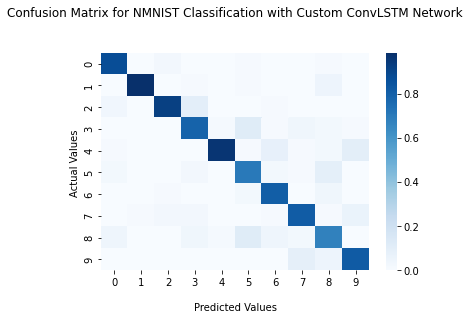

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
from keras.utils import np_utils
import seaborn as sns

#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), normalize='pred')

ax = sns.heatmap(result, annot=False, cmap='Blues')

ax.set_title('Confusion Matrix for NMNIST Classification with Custom ConvLSTM Network\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([i for i in range(10)])
ax.yaxis.set_ticklabels([i for i in range(10)])

# DVS128 Gesture

## Load Data

#### old

In [ ]:
!rm -rf /content/rpg_e2vid/data/DVS128Gesture
!rm -rf /content/datasets/DVS128Gesture
!mkdir /content/datasets
!unzip -q /content/drive/MyDrive/DVS128Gesture/'DVS  Gesture dataset.zip' -d /content/tmp
!tar -xzf /content/tmp/'DVS  Gesture dataset'/DvsGesture.tar.gz -C /content/datasets
!rm -rf tmp
!pip3 install -q dv
from dv import LegacyAedatFile
import os
import shutil

def read_aedat_events(input_file, output_file):
  text = "128 128\n"
  with LegacyAedatFile(input_file) as f:
    for event in f:
      text = text + "{0} {1} {2} {3}\n".format(event.timestamp, event.x, event.y, event.polarity)

  # Open a file with access mode 'a'
  file_object = open(output_file, 'w')
  # Append 'hello' at the end of file
  file_object.write(text)
  # Close the file
  file_object.close()

os.mkdir("/content/rpg_e2vid/data/DVS128Gesture")
max_samples = 100

def load_dvs_samples(train):
  folder = "train" if train else "test"
  os.mkdir("/content/rpg_e2vid/data/DVS128Gesture/{0}".format(folder))

  with open("/content/datasets/DvsGesture/trials_to_{0}.txt".format(folder)) as file:
      lines = file.readlines()
      train_files = [line.rstrip() for line in lines]
  print("Loading {0}ing samples:".format(folder))
  count = 0
  for file_name in train_files:
    if count < (max_samples if train else max_samples /4):
      zip_directory = "/content/rpg_e2vid/data/DVS128Gesture/{0}/{1}".format(folder, file_name[:-6])
      os.mkdir(zip_directory)
      input_directory = "/content/datasets/DvsGesture/{0}".format(file_name)
      output_directory = "{0}/events.txt".format(zip_directory)
      print("- {0}".format(file_name))
      e = read_aedat_events(input_directory, output_directory)
      shutil.make_archive(zip_directory, 'zip', zip_directory)
      shutil.rmtree(zip_directory, ignore_errors=False, onerror=None)
    count = count + 1

load_dvs_samples(train=True)
load_dvs_samples(train=False)

mkdir: cannot create directory ‘/content/datasets’: File exists
Loading training samples:
- user01_fluorescent.aedat
- user01_fluorescent_led.aedat
- user01_lab.aedat
- user01_led.aedat
- user01_natural.aedat
- user02_fluorescent.aedat
- user02_fluorescent_led.aedat
- user02_lab.aedat
- user02_led.aedat
- user02_natural.aedat
- user03_fluorescent.aedat
- user03_fluorescent_led.aedat
- user03_led.aedat
- user03_natural.aedat
- user04_fluorescent.aedat
- user04_fluorescent_led.aedat
- user04_led.aedat
- user04_natural.aedat
- user05_fluorescent.aedat
- user05_fluorescent_led.aedat
- user05_lab.aedat
- user05_led.aedat
- user05_natural.aedat
- user06_fluorescent.aedat
- user06_fluorescent_led.aedat
- user06_lab.aedat
- user06_led.aedat
- user06_natural.aedat
- user07_fluorescent.aedat
- user07_fluorescent_led.aedat
- user07_lab.aedat
- user07_led.aedat
- user08_fluorescent.aedat
- user08_fluorescent_led.aedat
- user08_lab.aedat
- user08_led.aedat
- user09_fluorescent.aedat
- user09_fluore

FileExistsError: ignored

#### new

In [ ]:
!rm -rf datasets
!mkdir datasets
!mkdir datasets/DVS128Gesture
!unzip -q /content/drive/MyDrive/DVS128Gesture/'DVS  Gesture dataset.zip' -d /content/datasets/DVS128Gesture
!mv /content/datasets/DVS128Gesture/'DVS  Gesture dataset' /content/datasets/DVS128Gesture/download
!pip -q install spikingjelly
from spikingjelly.datasets.dvs128_gesture import DVS128Gesture

root_dir = "/content/datasets/DVS128Gesture"
train_set = DVS128Gesture(root_dir, train=True, data_type='event')
test_set = DVS128Gesture(root_dir, train=False, data_type='event')

The [/content/datasets/DVS128Gesture/download] directory for saving downloaded files already exists, check files...
Mkdir [/content/datasets/DVS128Gesture/extract].
Extract [/content/datasets/DVS128Gesture/download/DvsGesture.tar.gz] to [/content/datasets/DVS128Gesture/extract].
Mkdir [/content/datasets/DVS128Gesture/events_np].
Start to convert the origin data from [/content/datasets/DVS128Gesture/extract] to [/content/datasets/DVS128Gesture/events_np] in np.ndarray format.
Mkdir [('/content/datasets/DVS128Gesture/events_np/train', '/content/datasets/DVS128Gesture/events_np/test').
Mkdir ['0', '4', '8', '7', '2', '3', '5', '1', '10', '9', '6'] in [/content/datasets/DVS128Gesture/events_np/train] and ['0', '4', '8', '7', '2', '3', '5', '1', '10', '9', '6'] in [/content/datasets/DVS128Gesture/events_np/test].
Start the ThreadPoolExecutor with max workers = [4].
Start to split [/content/datasets/DVS128Gesture/extract/DvsGesture/user01_fluorescent_led.aedat] to samples.
Start to split [/c

In [ ]:
def restructure_spikingjelly_events(input_file, output_file):
  d = np.load(input_file)
  d = np.array([d["t"], d["x"], d["y"], d["p"]])
  p = [[128, 128]]
  for i in range(len(d[0])):
    p.append(d[:, i])
  text = ""
  for item in p:
    if(len(item) == 4):
      text = text + "{0} {1} {2} {3}\n".format(item[0], item[1], item[2], item[3])
    else:
      text = text + "{0} {1}\n".format(item[0], item[1])
  # Open a file with access mode 'a'
  outfile = open(output_file, 'w')
  # Append 'hello' at the end of file
  outfile.write(text)
  # Close the file
  outfile.close()

In [ ]:
import os
import shutil

os.mkdir("/content/rpg_e2vid/data/DVS128Gesture")
max_samples = 300

def load_dvs_gesture_samples(train):
  print("Loading {0} samples".format("training" if train else "testing"))
  folder = "train" if train else "test"
  os.mkdir("/content/rpg_e2vid/data/DVS128Gesture/{0}".format(folder))
  for act_class in range(11):
    print(' class {0}'.format(act_class))
    directory = "/content/datasets/DVS128Gesture/events_np/{0}/{1}/".format(folder, act_class)
    os.mkdir("/content/rpg_e2vid/data/DVS128Gesture/{0}/{1}".format(folder, act_class))
    count = 0
    for sample in os.listdir(directory):
        zip_directory = "/content/rpg_e2vid/data/DVS128Gesture/{0}/{1}/{2}".format(folder, act_class, sample[:-4])
        input_directory = os.path.join(directory, sample)
        output_directory = "{0}/events.txt".format(zip_directory)
        if os.path.isfile(input_directory) and count < (max_samples if train else max_samples /4):
            if(count % 60 != 0 or count == 0):
              print(".", end="")
            else:
              print(".")
            os.mkdir(zip_directory)
            # events = read_events(input_directory, output_directory)
            restructure_spikingjelly_events(input_directory, output_directory)
            shutil.make_archive(zip_directory, 'zip', zip_directory)
            shutil.rmtree(zip_directory, ignore_errors=False, onerror=None)
        count = count + 1
    print("")

load_dvs_gesture_samples(train=True)
load_dvs_gesture_samples(train=False)

Loading training samples
 class 0
.............................................................
....................................
 class 1
.............................................................
.....................................
 class 2
.............................................................
.....................................
 class 3
.............................................................
.....................................
 class 4
.............................................................
.....................................
 class 5
.............................................................
.....................................
 class 6
.............................................................
......................................
 class 7
.............................................................
............................................................
............................................................
...............
 cl

## Create and save Video Reconstructions

#### old

In [ ]:
import subprocess

!rm -rf /content/reconstructions
os.mkdir("/content/reconstructions")
os.mkdir("/content/reconstructions/DVS128Gesture")

def reconstruct_DVS128(train):
  print("Reconstructing {0} samples".format("training" if train else "testing"))
  folder = "train" if train else "test"
  recon_directory = "/content/reconstructions/DVS128Gesture/{0}".format(folder)
  sample_directory = "/content/rpg_e2vid/data/DVS128Gesture/{0}".format(folder)
  os.mkdir(recon_directory)
  for sample in os.listdir(sample_directory):
    new_directory = "{0}/{1}".format(recon_directory, sample[:-4])
    os.mkdir(new_directory)
    print("- {0}".format(sample[:-4]))
    cmd = "python /content/rpg_e2vid/run_reconstruction.py \
          -c /content/rpg_e2vid/pretrained/E2VID_lightweight.pth.tar \
          -i {0}/{1} \
          --auto_hdr \
          --output_folder {2}/{1}".format(sample_directory, sample, recon_directory)
    # subprocess.call(cmd, shell=True)
    process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)
    output, error = process.communicate()
    # print(output.decode("utf-8") )
  print("")

reconstruct_DVS128(train=True)
reconstruct_DVS128(train=False)

Reconstructing training samples
- user01_fluorescent
- user12_fluorescent_led
- user16_led
- user13_led
- user23_led
- user19_fluorescent
- user06_fluorescent_led
- user08_fluorescent
- user04_fluorescent_led
- user02_led
- user14_fluorescent
- user04_fluorescent
- user05_fluorescent_led
- user14_fluorescent_led
- user03_led
- user05_fluorescent
- user22_led
- user15_led
- user23_fluorescent_led
- user11_natural
- user15_fluorescent
- user08_led
- user21_fluorescent
- user17_fluorescent
- user22_lab
- user21_lab
- user18_lab
- user03_fluorescent
- user05_natural
- user23_lab
- user16_natural
- user09_lab
- user06_natural
- user02_natural
- user13_fluorescent
- user15_lab
- user17_natural
- user05_led
- user16_lab
- user20_fluorescent_led
- user11_fluorescent
- user16_fluorescent
- user17_led
- user22_fluorescent_led
- user13_natural
- user10_fluorescent_led
- user05_lab
- user17_lab
- user14_natural
- user04_led
- user01_led
- user07_fluorescent
- user13_fluorescent_led
- user21_natura

#### new

In [ ]:
import subprocess

!rm -rf /content/reconstructions
os.mkdir("/content/reconstructions")
os.mkdir("/content/reconstructions/DVS128")

def reconstruct_DVS128Gesture(train):
  print("Reconstructing {0} samples".format("training" if train else "testing"))
  folder = "train" if train else "test"
  os.mkdir("/content/reconstructions/DVS128/{0}".format(folder))
  for act_class in range(11):
    print(' class {0}'.format(act_class))
    recon_directory = "/content/reconstructions/DVS128/{0}/{1}/".format(folder, act_class)
    os.mkdir(recon_directory)
    sample_directory = "data/DVS128Gesture/{0}/{1}/".format(folder, act_class)
    count = 0
    for sample in os.listdir("/content/rpg_e2vid/{0}".format(sample_directory)):
      new_directory = "{0}/{1}".format(recon_directory, sample[:-4])
      os.mkdir(new_directory)
      if(count % 60 != 0 or count == 0):
        print(".", end="")
      else:
        print(".")
      cmd = "python /content/rpg_e2vid/run_reconstruction.py \
            -c /content/rpg_e2vid/pretrained/E2VID_lightweight.pth.tar \
            -i /content/rpg_e2vid/{0}/{1} \
            --auto_hdr \
            --output_folder {2}".format(sample_directory, sample, new_directory)
      # subprocess.call(cmd, shell=True)
      process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)
      output, error = process.communicate()
      # print(output.decode("utf-8") )
      count = count + 1
    print("")

reconstruct_DVS128Gesture(train=True)
reconstruct_DVS128Gesture(train=False)

Reconstructing training samples
 class 0
.............................................................
....................................
 class 1
.............................................................
.....................................
 class 2
.............................................................
.....................................
 class 3
.............................................................
.....................................
 class 4
.............................................................
.....................................
 class 5
.............................................................
.....................................
 class 6
.............................................................
......................................
 class 7
.............................................................
............................................................
............................................................
............

In [ ]:
shutil.make_archive("DVS128_reconstructed", 'zip', "/content/reconstructions")
!cp /content/DVS128_reconstructed.zip /content/drive/MyDrive

'/content/DVS128_reconstructed.zip'

## Load Video Reconstructions

In [ ]:
!cp /content/drive/MyDrive/DVS128_reconstructed.zip /content
!unzip -q /content/DVS128_reconstructed.zip -d /content/reconstructions

#### old

In [ ]:
import os
import numpy as np

split = 6
max_frame_count = 0

print("Checking training reconstructions")
for act_class in range(10):
    class_directory = "/content/reconstructions/DVS128/train/{0}".format(act_class)
    count = 0
    for reconstruction in os.listdir(class_directory):
      if count < 5 * split:
        current_recon_dir = os.path.join(class_directory, reconstruction)
        frame_count = 0
        for frame in os.listdir("{0}/reconstruction".format(current_recon_dir)):
          f = os.path.join("{0}/reconstruction".format(current_recon_dir), frame)
          if frame.endswith('.png'):
            frame_count += 1
        if(frame_count > max_frame_count):
          max_frame_count = frame_count
        count += 1

print("Checking testing reconstructions")
for act_class in range(10):
    class_directory = "/content/reconstructions/DVS128/test/{0}".format(act_class)
    count = 0
    for reconstruction in os.listdir(class_directory):
      if count < split:
        current_recon_dir = os.path.join(class_directory, reconstruction)
        frame_count = 0
        for frame in os.listdir("{0}/reconstruction".format(current_recon_dir)):
          f = os.path.join("{0}/reconstruction".format(current_recon_dir), frame)
          if frame.endswith('.png'):
            frame_count += 1
        if(frame_count > max_frame_count):
          max_frame_count = frame_count
        count += 1

print("The maximum video length in the dataset is {0} frames".format(max_frame_count))

Checking training reconstructions
Checking testing reconstructions
The maximum video length in the dataset is 237 frames


In [ ]:
import os
import imageio
from keras.utils import np_utils
from itertools import islice, cycle

split = 6

x_train = []
y_train = []
print("Loading training reconstructions")
for act_class in range(10):
    print(' class {0}'.format(act_class))
    class_directory = "/content/reconstructions/DVS128/train/{0}".format(act_class)
    count = 0
    for reconstruction in os.listdir(class_directory):
      if count < split * 5:
        current_recon_dir = os.path.join(class_directory, reconstruction)
        if(count % 60 != 0 or count == 0):
          print(".", end="")
        else:
          print(".")
        current_recon = []
        for frame in os.listdir("{0}/reconstruction".format(current_recon_dir)):
          f = os.path.join("{0}/reconstruction".format(current_recon_dir), frame)
          if frame.endswith('.png'):
            im = imageio.imread(f)
            current_recon.append(im)
        current_recon = list(islice(cycle(current_recon), max_frame_count))
        x_train.append(current_recon)
        y_train.append(np_utils.to_categorical(act_class, 11))
        count = count + 1
    print("")

x_test = []
y_test = []
print("Loading testing reconstructions")
for act_class in range(10):
    print(' class {0}'.format(act_class))
    class_directory = "/content/reconstructions/DVS128/test/{0}".format(act_class)
    count = 0
    for reconstruction in os.listdir(class_directory):
      if count < split:
        current_recon_dir = os.path.join(class_directory, reconstruction)
        if(count % 60 != 0 or count == 0):
          print(".", end="")
        else:
          print(".")
        current_recon = []
        for frame in os.listdir("{0}/reconstruction".format(current_recon_dir)):
          f = os.path.join("{0}/reconstruction".format(current_recon_dir), frame)
          if frame.endswith('.png'):
            im = imageio.imread(f)
            current_recon.append(im)
        current_recon = list(islice(cycle(current_recon), max_frame_count))
        x_test.append(current_recon)
        y_test.append(np_utils.to_categorical(act_class, 11))
        count = count + 1
    print("")

Loading training reconstructions
 class 0
..............................
 class 1
..............................
 class 2
..............................
 class 3
..............................
 class 4
..............................
 class 5
..............................
 class 6
..............................
 class 7
..............................
 class 8
..............................
 class 9
..............................
Loading testing reconstructions
 class 0
......
 class 1
......
 class 2
......
 class 3
......
 class 4
......
 class 5
......
 class 6
......
 class 7
......
 class 8
......
 class 9
......


In [ ]:
# import pickle
import numpy as np
from sklearn.model_selection import train_test_split

x_train = np.array(x_train)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], x_train.shape[3], 1)
x_test = np.array(x_test)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], x_test.shape[3], 1)

train_mean = np.mean(x_train)
train_max = np.max(x_train)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=4)

y_train = np.array(y_train)
# open_file = open("/content/DVS_recon_y_train.pkl", "wb")
# pickle.dump(y_train, open_file, protocol=4)
# open_file.close()
# del y_train

y_val = np.array(y_val)
# open_file = open("/content/DVS_recon_y_val.pkl", "wb")
# pickle.dump(y_val, open_file, protocol=4)
# open_file.close()
# del y_val

y_test = np.array(y_test)
# open_file = open("/content/DVS_recon_y_test.pkl", "wb")
# pickle.dump(y_test, open_file, protocol=4)
# open_file.close()
# del y_test

x_train = x_train.astype('float16')
x_train -= train_mean
x_train /= train_max

# open_file = open("/content/DVS_recon_x_train.pkl", "wb")
# pickle.dump(x_train, open_file, protocol=4)
# open_file.close()
# del x_train

x_val = x_val.astype('float16')
x_val -= train_mean
x_val /= train_max

# open_file = open("/content/DVS_recon_x_val.pkl", "wb")
# pickle.dump(x_val, open_file, protocol=4)
# open_file.close()
# del x_val

x_test = x_test.astype('float16')
x_test -= train_mean
x_test /= train_max

# open_file = open("/content/DVS_recon_x_test.pkl", "wb")
# pickle.dump(x_test, open_file, protocol=4)
# open_file.close()
# del x_test

In [ ]:
import pickle

print(x_train.shape)
print(y_train.shape)

(240, 237, 128, 128, 1)
(240, 11)


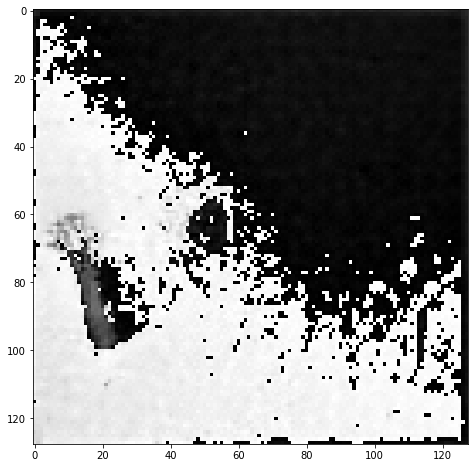

In [ ]:
import matplotlib.pyplot as plt

disp = x_train[0][0]
disp = disp.reshape(disp.shape[:-1])
disp = (disp * 255).astype(np.uint8)
plt.imshow(disp, cmap='gray')
plt.gcf().set_size_inches(10, 8)

#### new

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split

max_frame_count = 0

training_filepaths = []
training_labels = []
print("Checking training reconstructions")
for act_class in range(10):
    class_directory = "/content/reconstructions/DVS128/train/{0}".format(act_class)
    for reconstruction in os.listdir(class_directory):
      current_recon_dir = os.path.join(class_directory, reconstruction)
      training_filepaths.append(current_recon_dir)
      training_labels.append(act_class)
      frame_count = 0
      for frame in os.listdir("{0}/reconstruction".format(current_recon_dir)):
        f = os.path.join("{0}/reconstruction".format(current_recon_dir), frame)
        if frame.endswith('.png'):
          frame_count += 1
      if(frame_count > max_frame_count):
        max_frame_count = frame_count

testing_filepaths = []
testing_labels = []
print("Checking testing reconstructions")
for act_class in range(10):
    class_directory = "/content/reconstructions/DVS128/test/{0}".format(act_class)
    for reconstruction in os.listdir(class_directory):
      current_recon_dir = os.path.join(class_directory, reconstruction)
      testing_filepaths.append(current_recon_dir)
      testing_labels.append(act_class)
      frame_count = 0
      for frame in os.listdir("{0}/reconstruction".format(current_recon_dir)):
        f = os.path.join("{0}/reconstruction".format(current_recon_dir), frame)
        if frame.endswith('.png'):
          frame_count += 1
      if(frame_count > max_frame_count):
        max_frame_count = frame_count

training_filepaths, validation_filepaths, training_labels, validation_labels = train_test_split(training_filepaths, training_labels, test_size=0.2, random_state=4)

print("The maximum video length in the dataset is {0} frames".format(max_frame_count))
print("Training samples: {0}".format(len(training_filepaths)))
print("Validation samples: {0}".format(len(validation_filepaths)))
print("Testing samples: {0}".format(len(testing_filepaths)))

Checking training reconstructions
Checking testing reconstructions
The maximum video length in the dataset is 279 frames
Training samples: 862
Validation samples: 216
Testing samples: 264


In [ ]:
import os
import imageio
from keras.utils import np_utils
from itertools import islice, cycle

x_train = []
print("Loading training reconstructions")
for act_class in range(10):
    print(' class {0}'.format(act_class))
    class_directory = "/content/reconstructions/DVS128/train/{0}".format(act_class)
    for reconstruction in os.listdir(class_directory):
      current_recon_dir = os.path.join(class_directory, reconstruction)
      current_recon = []
      for frame in os.listdir("{0}/reconstruction".format(current_recon_dir)):
        f = os.path.join("{0}/reconstruction".format(current_recon_dir), frame)
        if frame.endswith('.png'):
          im = imageio.imread(f)
          current_recon.append(im)
      current_recon = list(islice(cycle(current_recon), max_frame_count))
      x_train.append(current_recon)

x_train = np.array(x_train)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], x_train.shape[3], 1)
train_mean = np.mean(x_train)
train_max = np.max(x_train)
del x_train

print("The mean of the training dataset is: {0}".format(train_mean))
print("The max of the training dataset is: {0}".format(train_max))

Loading training reconstructions
 class 0
 class 1
 class 2
 class 3
 class 4
 class 5
 class 6
 class 7
 class 8
 class 9
The mean of the training dataset is: 146.90482245084465
The max of the training dataset is: 255


In [ ]:
from tensorflow.keras.utils import Sequence
from skimage.io import imread
from skimage.transform import resize
import numpy as np
import os
from keras.utils import np_utils
from itertools import islice, cycle
import imageio

class MyGenerator(Sequence):

    def __init__(self, video_filepaths, labels, batch_size, max_frame_count, train_mean, train_max):
        self.video_filepaths, self.labels = video_filepaths, [np_utils.to_categorical(label, 11) for label in labels]
        self.batch_size = batch_size
        self.max_frame_count = max_frame_count
        self.train_mean = train_mean
        self.train_max = train_max

    def __len__(self):
        return int(np.ceil(len(self.video_filepaths) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.video_filepaths[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.labels[idx * self.batch_size:(idx + 1) * self.batch_size]
        x_ret = []
        for reconstruction_dir in batch_x:
          current_recon = []
          for frame in os.listdir("{0}/reconstruction".format(reconstruction_dir)):
            f = os.path.join("{0}/reconstruction".format(reconstruction_dir), frame)
            if frame.endswith('.png'):
              im = imageio.imread(f)
              current_recon.append(im)
          current_recon = list(islice(cycle(current_recon), self.max_frame_count))
          x_ret.append(current_recon)

        x_ret = np.array(x_ret)
        x_ret = x_ret.reshape(x_ret.shape[0], x_ret.shape[1], x_ret.shape[2], x_ret.shape[3], 1)
        x_ret = x_ret.astype('float16')
        x_ret -= self.train_mean
        x_ret /= self.train_max
        return x_ret, np.array(batch_y)

batch_size = 1
my_training_batch_generator = MyGenerator(training_filepaths, training_labels, batch_size, max_frame_count, train_mean, train_max)
my_validation_batch_generator = MyGenerator(validation_filepaths, validation_labels, batch_size, max_frame_count, train_mean, train_max)
my_testing_batch_generator = MyGenerator(testing_filepaths, testing_labels, batch_size, max_frame_count, train_mean, train_max)

## Classification Networks

### Custom Conv3D Network

Cite as:
Channayanamath M. et al. (2021) Dynamic Hand Gesture Recognition Using 3D-Convolutional Neural Network. In: Satapathy S.C., Bhateja V., Ramakrishna Murty M., Gia Nhu N., Jayasri Kotti (eds) Communication Software and Networks. Lecture Notes in Networks and Systems, vol 134. Springer, Singapore. http://doi-org-443.webvpn.fjmu.edu.cn/10.1007/978-981-15-5397-4_16

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution3D, MaxPooling3D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from keras.callbacks import TensorBoard, EarlyStopping
from sklearn.model_selection import train_test_split
import keras
import pickle

# Initialing the Training Parameters
batch_size = 4
nb_classes = 11
nb_epoch = 120

# Number of convolutional filters to use at each layer
nb_filters = 16
# Level of pooling to perform at each layer (POOL x POOL)
nb_pool = 3
# Level of convolution to perform at each layer (CONV x CONV)
nb_conv = 5

# Defining the 3D Convolution Neural Network model
model = Sequential()
model.add(Convolution3D(nb_filters,kernel_size=nb_conv,input_shape=(max_frame_count, 128, 128, 1), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Convolution3D(nb_filters,kernel_size=nb_conv,input_shape=(max_frame_count, 128, 128, 1), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling3D(pool_size=nb_pool,padding='same'))

model.add(Dropout(0.25))

model.add(Convolution3D(nb_filters*2,kernel_size=nb_conv,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling3D(pool_size=nb_pool,padding='same'))

model.add(Dropout(0.25))

model.add(Convolution3D(nb_filters*4,kernel_size=nb_conv,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Convolution3D(nb_filters*4,kernel_size=nb_conv,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling3D(pool_size=nb_pool,padding='same'))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,kernel_initializer = 'he_normal',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(nb_classes,kernel_initializer = 'he_normal'))
model.add(Activation('softmax'))

opt=Adam(lr=0.0001)

# Compile the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

logdir = "logs/scalars/conv3d_dvs128"

# Training  the model along with creating callbacks to tensorboard for graphical visualization of training process
tbcallback = keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=0, write_graph=True, write_images=True)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True)
# hist = model.fit(x_train, y_train, validation_data=(x_val,y_val),
#           epochs = nb_epoch,shuffle=True,verbose=1,callbacks=[tbcallback, early_stopping])
hist = model.fit(x=my_training_batch_generator, validation_data=my_validation_batch_generator,
          epochs=nb_epoch, shuffle=True, verbose=1, callbacks=[tbcallback, early_stopping],
          use_multiprocessing=False, workers=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/120
144/144 [==============================] - 467s 3s/step - loss: 2.1314 - accuracy: 0.3028 - val_loss: 2.7492 - val_accuracy: 0.1019
Epoch 2/120
144/144 [==============================] - 464s 3s/step - loss: 1.4629 - accuracy: 0.4919 - val_loss: 4.0500 - val_accuracy: 0.1019
Epoch 3/120
144/144 [==============================] - 465s 3s/step - loss: 1.2573 - accuracy: 0.5371 - val_loss: 4.7104 - val_accuracy: 0.1019
Epoch 4/120
144/144 [==============================] - 465s 3s/step - loss: 1.1890 - accuracy: 0.5893 - val_loss: 3.3627 - val_accuracy: 0.1157
Epoch 5/120
144/144 [==============================] - 465s 3s/step - loss: 1.0793 - accuracy: 0.6288 - val_loss: 1.2414 - val_accuracy: 0.5463
Epoch 6/120
144/144 [==============================] - 464s 3s/step - loss: 0.9705 - accuracy: 0.6357 - val_loss: 0.8889 - val_accuracy: 0.6898
Epoch 7/120
144/144 [==============================] - 464s 3s/step - loss: 1.0216 - accuracy: 0.6288 - val_loss: 1.1616 - val_accuracy:

In [ ]:
from keras.models import load_model

model.save('/content/drive/MyDrive/models/conv3d_dvs128_recon.h5')  # creates a HDF5 file 'my_model.h5'
# del model  # deletes the existing model

#### Results

In [ ]:
from keras.models import load_model

model = load_model('/content/drive/MyDrive/models/conv3d_dvs128.h5')

In [ ]:
score = model.evaluate(x=my_testing_batch_generator, verbose=0)
y_pred = model.predict(x=my_testing_batch_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0933377742767334
Test accuracy: 0.6325757503509521


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(testing_labels, y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.53      0.88      0.66        24
           1       0.85      0.96      0.90        24
           2       0.88      0.88      0.88        24
           3       0.43      0.92      0.59        24
           4       0.42      0.21      0.28        24
           5       0.61      0.58      0.60        24
           6       0.52      0.71      0.60        24
           7       0.76      0.60      0.67        48
           8       1.00      0.21      0.34        24
           9       0.91      0.42      0.57        24

    accuracy                           0.63       264
   macro avg       0.69      0.64      0.61       264
weighted avg       0.70      0.63      0.61       264



[Text(0, 0.5, '0'),
 Text(0, 1.5, '1'),
 Text(0, 2.5, '2'),
 Text(0, 3.5, '3'),
 Text(0, 4.5, '4'),
 Text(0, 5.5, '5'),
 Text(0, 6.5, '6'),
 Text(0, 7.5, '7'),
 Text(0, 8.5, '8'),
 Text(0, 9.5, '9')]

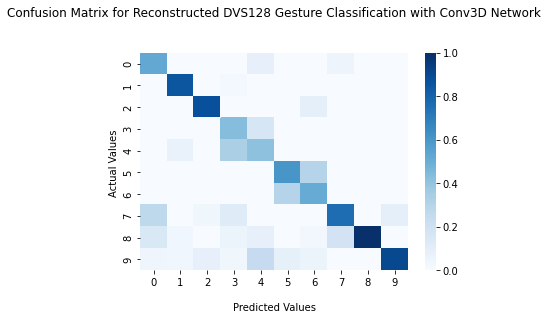

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
from keras.utils import np_utils
import seaborn as sns

#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(testing_labels, y_pred.argmax(axis=1), normalize='pred')

ax = sns.heatmap(result, annot=False, cmap='Blues')

ax.set_title('Confusion Matrix for Reconstructed DVS128 Gesture Classification with Conv3D Network\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([i for i in range(12)])
ax.yaxis.set_ticklabels([i for i in range(12)])

### Conv LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.callbacks import TensorBoard
import keras
from sklearn.model_selection import train_test_split

# config = tf.compat.v1.ConfigProto
# config.gpu_options.allow_growth = True
# tf.Session(config = config)

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

# config = tf.ConfigProto(device_count ={'GPU': 0})
# sess = tf.Session(config=config)

timesteps = max_frame_count
width = 128
height = 128
channels = 1
action_num = 11

model = models.Sequential(
    [
        layers.Input(
            shape=(timesteps, width, height, channels)
        ),
        layers.ConvLSTM2D(
            filters=16, kernel_size=(3, 3), padding="same", return_sequences=True, dropout=0.1, recurrent_dropout=0.1
        ),
        layers.MaxPool3D(
            pool_size=(1, 2, 2), strides=(1, 2, 2), padding="same"
        ),
        layers.BatchNormalization(),
        layers.ConvLSTM2D(
            filters=8, kernel_size=(3, 3), padding="same", return_sequences=True, dropout=0.1, recurrent_dropout=0.1
        ),
        layers.MaxPool3D(
            pool_size=(1, 2, 2), strides=(1, 2, 2), padding="same"
        ),
        layers.BatchNormalization(),
        layers.ConvLSTM2D(
            filters=4, kernel_size=(3, 3), padding="same", return_sequences=False, dropout=0.1, recurrent_dropout=0.1
        ),
        layers.MaxPool2D(
            pool_size=(2, 2), strides=(2, 2), padding="same"
        ),
        layers.BatchNormalization(),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(action_num, activation='softmax')
    ]
)

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-4),
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True)
logdir = "logs/NMNIST_ConvLSTM"
# Training  the model along with creating callbacks to tensorboard for graphical visualization of training process
tbcallback = keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=0, write_graph=True, write_images=True)

hist = model.fit(x=my_training_batch_generator, validation_data=my_validation_batch_generator,
          epochs=120, shuffle=True, verbose=1, callbacks=[tbcallback, early_stopping],
          use_multiprocessing=False, workers=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/120
 14/862 [..............................] - ETA: 1:07:34 - loss: 2.4717 - accuracy: 0.2143

KeyboardInterrupt: ignored

In [ ]:
from keras.models import load_model

model.save('/content/drive/MyDrive/models/conv_lstm_nmnist_recon.h5')  # creates a HDF5 file 'my_model.h5'
# del model  # deletes the existing model

#### Results

In [ ]:
from keras.models import load_model

model = load_model('/content/drive/MyDrive/models/conv_lstm_nmnist_recon.h5')

In [ ]:
score = model.evaluate(x=my_testing_batch_generator, verbose=0)
y_pred = model.predict(x=my_testing_batch_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6660446524620056
Test accuracy: 0.7960000038146973


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(testing_labels, y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87        75
           1       0.96      0.96      0.96        75
           2       0.82      0.91      0.86        75
           3       0.77      0.57      0.66        75
           4       0.74      0.72      0.73        75
           5       0.67      0.71      0.69        75
           6       0.88      0.85      0.86        75
           7       0.85      0.84      0.85        75
           8       0.74      0.64      0.69        75
           9       0.71      0.84      0.77        75

    accuracy                           0.80       750
   macro avg       0.80      0.80      0.79       750
weighted avg       0.80      0.80      0.79       750



[Text(0, 0.5, '0'),
 Text(0, 1.5, '1'),
 Text(0, 2.5, '2'),
 Text(0, 3.5, '3'),
 Text(0, 4.5, '4'),
 Text(0, 5.5, '5'),
 Text(0, 6.5, '6'),
 Text(0, 7.5, '7'),
 Text(0, 8.5, '8'),
 Text(0, 9.5, '9')]

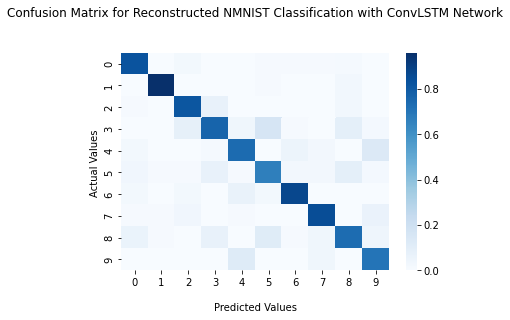

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
from keras.utils import np_utils
import seaborn as sns

#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(testing_labels, y_pred.argmax(axis=1), normalize='pred')

ax = sns.heatmap(result, annot=False, cmap='Blues')

ax.set_title('Confusion Matrix for Reconstructed NMNIST Classification with ConvLSTM Network\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([i for i in range(10)])
ax.yaxis.set_ticklabels([i for i in range(10)])

### Custom LTSM Network 1

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

def build_convnet(shape=(128, 128, 1)):
  model = Sequential()
  model.add(Conv2D(256, (3,3), padding='same', input_shape=shape))
  model.add(Activation('relu'))

  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(128, (5,5), padding='same'))
  model.add(Activation('relu'))

  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(64, (7,7), padding='same'))
  model.add(Activation('relu'))

  model.add(MaxPooling2D(pool_size=(2,2)))

  # model.add(Conv2D(64, (9,9), padding='same'))
  # model.add(Activation('relu'))

  # model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Flatten())

  # model.add(Dense(512))
  # model.add(Activation('relu'))
  return model

In [ ]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.layers import TimeDistributed, GRU

def action_model(shape=(20, 128, 128, 1), nbout=12):
    # Create our convnet with (34, 34, 1) input shape
    print("done")
    convnet = build_convnet(shape[1:])

    # then create our final model
    model = Sequential()
    # add the convnet with (8, 34, 34, 1) shape
    model.add(TimeDistributed(convnet, input_shape=shape))
    # here, you can also use GRU or LSTM
    model.add(GRU(64))
    # and finally, we make a decision network
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(nbout, activation='softmax'))
    return model

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import TensorBoard
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

model = action_model((max_frame_count, 128, 128, 1), 11)
opt = Adam(lr=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True)
logdir = "logs/NMNIST_ConvLSTM"
# Training  the model along with creating callbacks to tensorboard for graphical visualization of training process
tbcallback = keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=0, write_graph=True, write_images=True)


hist = model.fit(x=my_training_batch_generator, validation_data=my_validation_batch_generator,
          epochs=120, shuffle=True, verbose=1, callbacks=[tbcallback, early_stopping],
          use_multiprocessing=False, workers=1)

done


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/120
862/862 [==============================] - 625s 713ms/step - loss: 2.3508 - accuracy: 0.1462 - val_loss: 2.2179 - val_accuracy: 0.2130
Epoch 2/120
862/862 [==============================] - 613s 710ms/step - loss: 2.0098 - accuracy: 0.2181 - val_loss: 1.3840 - val_accuracy: 0.4491
Epoch 3/120
862/862 [==============================] - 611s 709ms/step - loss: 1.4636 - accuracy: 0.4095 - val_loss: 1.0762 - val_accuracy: 0.5417
Epoch 4/120
862/862 [==============================] - 611s 709ms/step - loss: 1.1951 - accuracy: 0.5000 - val_loss: 0.8529 - val_accuracy: 0.5787
Epoch 5/120
862/862 [==============================] - 611s 709ms/step - loss: 0.9392 - accuracy: 0.5835 - val_loss: 0.6863 - val_accuracy: 0.6944
Epoch 6/120
862/862 [==============================] - 611s 709ms/step - loss: 0.7790 - accuracy: 0.6566 - val_loss: 0.5558 - val_accuracy: 0.7083
Epoch 7/120
862/862 [==============================] - 612s 709ms/step - loss: 0.6415 - accuracy: 0.7135 - val_loss: 0

In [ ]:
from keras.models import load_model

model.save('/content/drive/MyDrive/models/custom_conv_lstm_dvs128_recon.h5')  # creates a HDF5 file 'my_model.h5'
# del model  # deletes the existing model

#### Results

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/models/custom_conv_lstm_dvs128_recon.h5')

In [ ]:
score = model.evaluate(x=my_testing_batch_generator, verbose=0)
y_pred = model.predict(x=my_testing_batch_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8456490635871887
Test accuracy: 0.8295454382896423


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(testing_labels, y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.67      0.83      0.74        24
           1       0.86      1.00      0.92        24
           2       0.89      1.00      0.94        24
           3       0.85      0.46      0.59        24
           4       0.66      0.88      0.75        24
           5       0.95      0.79      0.86        24
           6       0.81      0.88      0.84        24
           7       0.88      0.92      0.90        48
           8       0.81      0.54      0.65        24
           9       1.00      0.92      0.96        24

    accuracy                           0.83       264
   macro avg       0.84      0.82      0.82       264
weighted avg       0.84      0.83      0.82       264



[Text(0, 0.5, '0'),
 Text(0, 1.5, '1'),
 Text(0, 2.5, '2'),
 Text(0, 3.5, '3'),
 Text(0, 4.5, '4'),
 Text(0, 5.5, '5'),
 Text(0, 6.5, '6'),
 Text(0, 7.5, '7'),
 Text(0, 8.5, '8'),
 Text(0, 9.5, '9')]

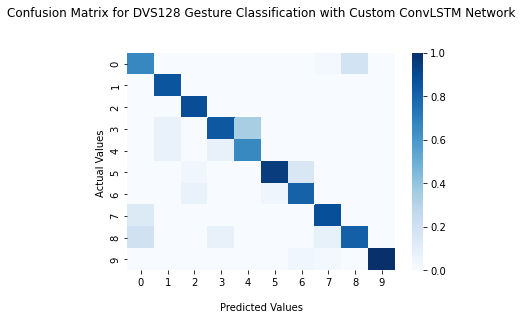

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
from keras.utils import np_utils
import seaborn as sns

#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(testing_labels, y_pred.argmax(axis=1), normalize='pred')

ax = sns.heatmap(result, annot=False, cmap='Blues')

ax.set_title('Confusion Matrix for DVS128 Gesture Classification with Custom ConvLSTM Network\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([i for i in range(12)])
ax.yaxis.set_ticklabels([i for i in range(12)])

# For Presentation

In [ ]:
!unzip -q NMNIST_reconstructed.zip -d /content/reconstructions

In [ ]:
from PIL import Image
import os

frames = []
dir = "/content/reconstructions/NMNIST/Train/6/01270/reconstruction"

for frame in os.listdir(dir):
  if frame.endswith('.png'):
    frames.append(Image.open("{0}/{1}".format(dir, frame)))

# Save into a GIF file that loops forever
frames[0].save('nmnist_train_6_01270_recontructed.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=300, loop=0)

In [ ]:
!unzip -q /content/DVS128_reconstructed.zip -d /content/reconstructions

In [ ]:
from PIL import Image
import os

frames = []
dir = "/content/reconstructions/DVS128/train/6/user15_lab_0/reconstruction"
for frame in os.listdir(dir):
  if frame.endswith('.png'):
    frames.append(Image.open("{0}/{1}".format(dir, frame)))

# Save into a GIF file that loops forever
frames[0].save('dvs128_train_600_reconstructed.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=300, loop=0)